In [391]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import time
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats
import numpy as np

# df = pd.read_csv('Datasets/2019_nCoV_data.csv')
df = pd.read_csv('Datasets/covid_19_data.csv')


In [392]:
df.shape

(2699, 8)

In [393]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2699 entries, 0 to 2698
Data columns (total 8 columns):
SNo                2699 non-null int64
ObservationDate    2699 non-null object
Province/State     1899 non-null object
Country/Region     2699 non-null object
Last Update        2699 non-null object
Confirmed          2699 non-null float64
Deaths             2699 non-null float64
Recovered          2699 non-null float64
dtypes: float64(3), int64(1), object(4)
memory usage: 168.8+ KB


In [394]:
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [395]:
df['ObservationDate'] = df['ObservationDate'].astype('datetime64')
df['Confirmed'] = df['Confirmed'].astype('int64')
df['Deaths'] = df['Deaths'].astype('int64')
df['Recovered'] = df['Recovered'].astype('int64')
df = df.rename(columns={'ObservationDate': 'Date'})

In [396]:
df_date=pd.DataFrame(df.groupby(by='Date').sum())
if 'SNo' in df_date.columns:
    df_date=df_date.drop('SNo',axis=1)
df_date['Date']=df_date.index
df_date.Date=df_date.Date.apply(lambda x:x.date())

In [397]:
melted_data = pd.melt(df_date, id_vars=['Date'])


In [398]:
def bar_plot(column_name):
    plt.figure(figsize=(10, 15))
    plt.xticks(rotation=90)
    plt.xlabel('Date', fontsize=18)
    plot_1 = sns.barplot(x='Date',y=column_name,data=df_date, ci=None)
    plot_1
    

### Recovered cases over time

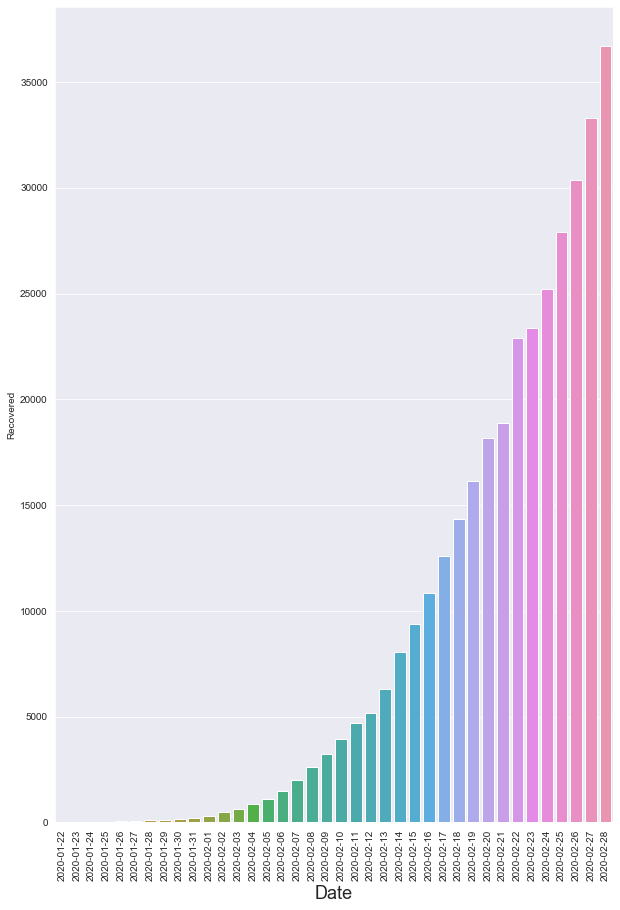

In [399]:
bar_plot('Recovered')

This graph shows that the recovery rate over these days has increases quite good.

### Deceases over time

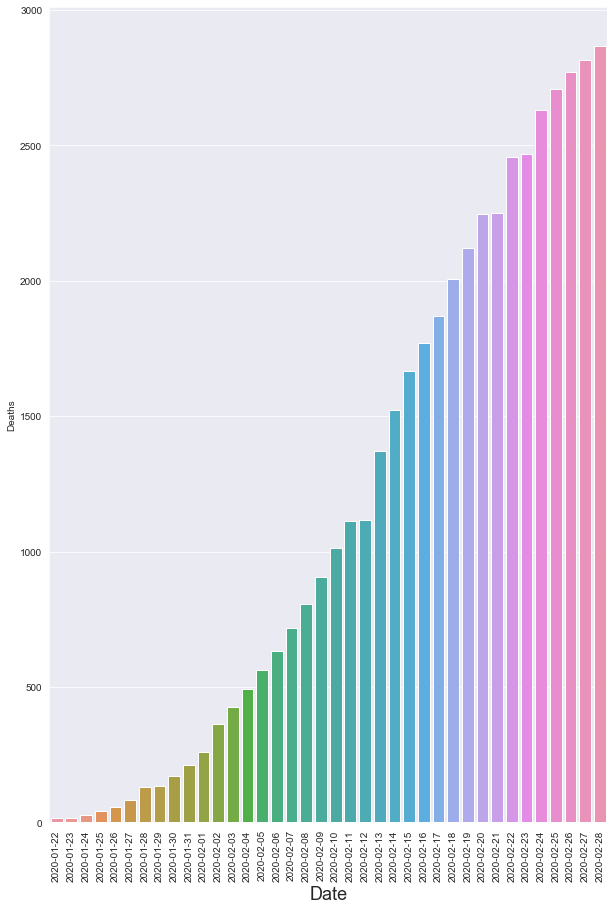

In [400]:
bar_plot('Deaths')

### Confirmed cases over time

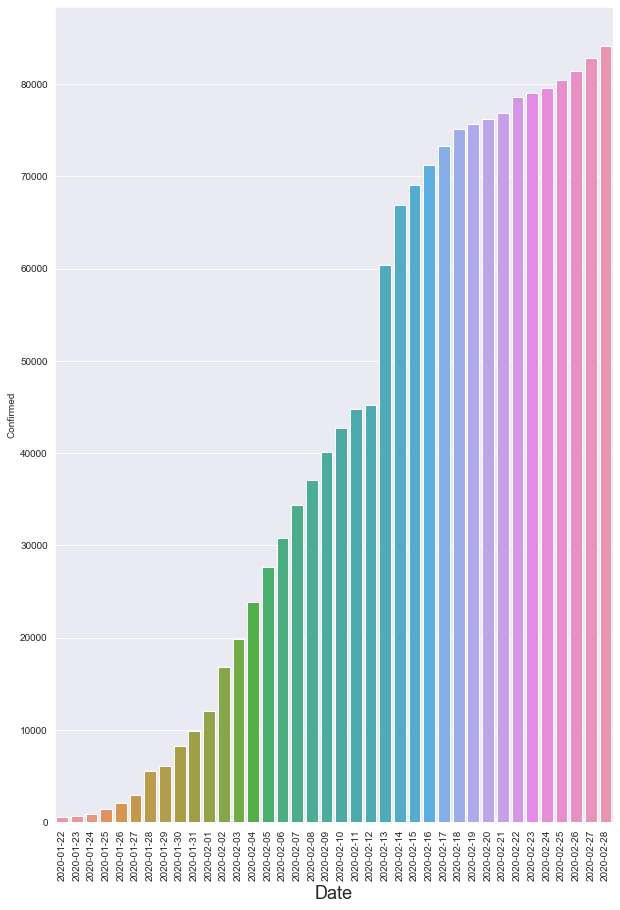

In [401]:
bar_plot('Confirmed')

The virus has grown <strong>exponentially</strong>.

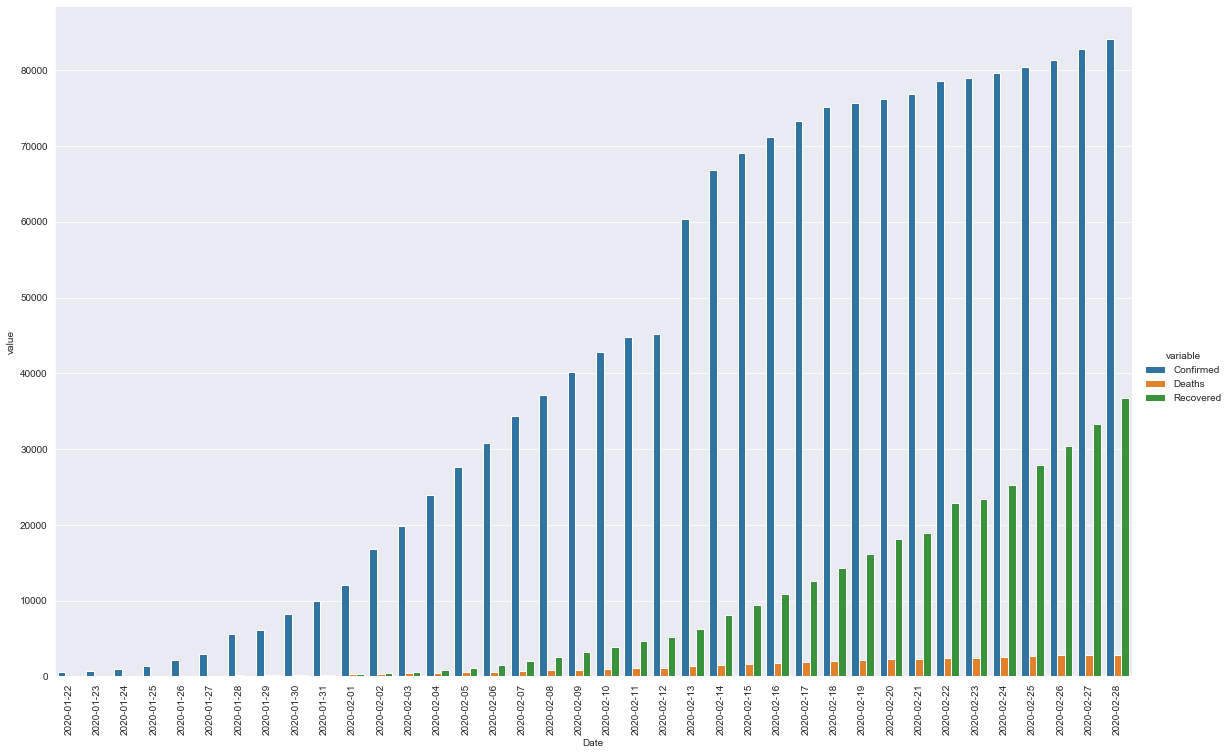

In [402]:
combine_data = sns.catplot(x='Date', y='value', hue='variable', data=melted_data, kind='bar',height=10,aspect =1.6,legend=True)
combine_data.set_xticklabels( rotation=90)

In [403]:
df_date.head()

,Confirmed,Deaths,Recovered,Date
Date,,,,
2020-01-22,555,17,28,2020-01-22
2020-01-23,653,18,30,2020-01-23
2020-01-24,941,26,36,2020-01-24
2020-01-25,1438,42,39,2020-01-25
2020-01-26,2118,56,52,2020-01-26


In [404]:
import plotly.express as px
fig = px.line(melted_data, x="Date",y='value', color='variable')
fig.show()

In [405]:
# Because our dataset is cumulativ, we should take the max.
latest_data=df[(df.Date==max(df["Date"]))]

In [406]:
data_each_country = pd.DataFrame(latest_data.groupby(by='Country/Region').sum())
if 'SNo' in data_each_country:
    data_each_country=data_each_country.drop('SNo',axis=1)
data_each_country['country']=data_each_country.index



In [407]:
print('Total number of confirmed cases over these days is',sum(data_each_country['Confirmed']))

Total number of confirmed cases over these days is 84124


In [408]:
data_each_country.sort_values(['Confirmed','Deaths','Recovered'], ascending=[False,False,False])

,Confirmed,Deaths,Recovered,country
Country/Region,,,,
Mainland China,78824,2788,36291,Mainland China
South Korea,2337,13,22,South Korea
Italy,888,21,46,Italy
Others,705,1,10,Others
Iran,388,34,73,Iran
...,...,...,...,...
New Zealand,1,0,0,New Zealand
Nigeria,1,0,0,Nigeria
North Ireland,1,0,0,North Ireland


In [409]:
# sns.catplot(y="Country/Region", x="Confirmed", data=df['Country/Region'],kind='boxen',height=9,aspect=1.4);

In [410]:
# geo_df["country"].replace({"Azerbaijan":"Europe",
#                                       "Belarus":"Europe",
#                                       "Estonia": "Europe",
#                                       "Georgia": "Europe",
#                                       "Lithuania": "Europe",
#                                       "North Ireland": "Europe",
#                                       "North Macedonia": "Europe",
#                                       "San Marino": "Europe",
#                                       "United Arab Emirates": "Asia",
#                                       "Mainland China": "Asia",
#                                       "Hong Kong":"Asia",
#                                       "South Korea":"Asia",
#                                       "UK":"Europe",
#                                       "US":"Amercas",
#                                       "Macau" :"China"
#                                    }, inplace=True)

# geo_df[geo_df['country'] == "Azerbaijan", 'continent'] = "Europe"
# geo_df


In [411]:
graph_df = px.data.gapminder().query("year == 2007")
geo_df = pd.merge(data_each_country, graph_df, how='left', on='country')
geo_df

,Confirmed,Deaths,Recovered,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,1,0,0,Azerbaijan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0,0,Afghanistan,Asia,2007.0,43.828,31889923.0,974.580338,AFG,4.0
2,1,0,0,Algeria,Africa,2007.0,72.301,33333216.0,6223.367465,DZA,12.0
3,23,0,11,Australia,Oceania,2007.0,81.235,20434176.0,34435.367440,AUS,36.0
4,3,0,0,Austria,Europe,2007.0,79.829,8199783.0,36126.492700,AUT,40.0
...,...,...,...,...,...,...,...,...,...,...,...
56,41,0,28,Thailand,Asia,2007.0,70.616,65068149.0,7458.396327,THA,764.0
57,20,0,8,UK,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,62,0,7,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,19,0,5,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [412]:
geo_df.loc[geo_df.continent.isnull()]


,Confirmed,Deaths,Recovered,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,1,0,0,Azerbaijan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1,0,0,Belarus,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,1,0,0,Estonia,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,1,0,0,Georgia,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,94,2,30,Hong Kong,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,1,0,0,Lithuania,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,10,0,8,Macau,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,78824,2788,36291,Mainland China,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,1,0,0,North Ireland,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,1,0,0,North Macedonia,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### How does the virus spread to other countries?

In [413]:
geo_df = geo_df.dropna(how='any')
geo_df = geo_df.drop(['year','lifeExp','pop','gdpPercap'],axis=1)

In [414]:
fig = px.scatter_geo(geo_df[geo_df['country'] != 'China'], locations="iso_alpha",
                     size="Confirmed", 
                     color="continent",
                     hover_name="country",
                     projection="natural earth",
                     )
fig.show()

In [420]:
import datetime as dt

df_countrybydate = df.groupby(['Country/Region', 'Last Update', 'Date']).sum().reset_index().sort_values('Last Update', ascending=False)
df_countrybydate = df_countrybydate.groupby(['Country/Region', 'Date']).max().reset_index().sort_values('Last Update')
df_countrybydate["Size"] = np.where(df_countrybydate['Country/Region']=='Mainland China', df_countrybydate['Confirmed'], df_countrybydate['Confirmed']*200)
# df_countrybydate['UpDate'] = df_countrybydate['Date'].apply(lambda x: dt.datetime(x.year,x.month,x.day))
# df_countrybydate['Date'] = pd.to_datetime(df_countrybydate['Date']).apply(lambda x: x.date())
# df_countrybydate['Date']= pd.to_datetime(df_countrybydate['Date']) 
df_countrybydate['Date'] = pd.to_datetime(df_countrybydate['Date'], dayfirst=True).dt.strftime('%Y-%m-%d')



### How does the virus spread over time?

In [428]:
fig = px.scatter_geo(df_countrybydate, locations="Country/Region", locationmode = "country names",
                     hover_name="Country/Region", size="Size", color="Confirmed",
                     animation_frame="Date", 
                     projection="natural earth",
                     title="Progression of Coronavirus in Confirmed Cases in the January 2020",template="none"
                    )
fig.show()


In [415]:
mortality_rate = []

for i in date:
    death_sum = df_date['Deaths'][i].sum()
    confirmed_sum = df_date['Confirmed'][i].sum()
    mortality_rate.append(death_sum/confirmed_sum)

In [416]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

### What is the mortality rate of Coronavirus over time?

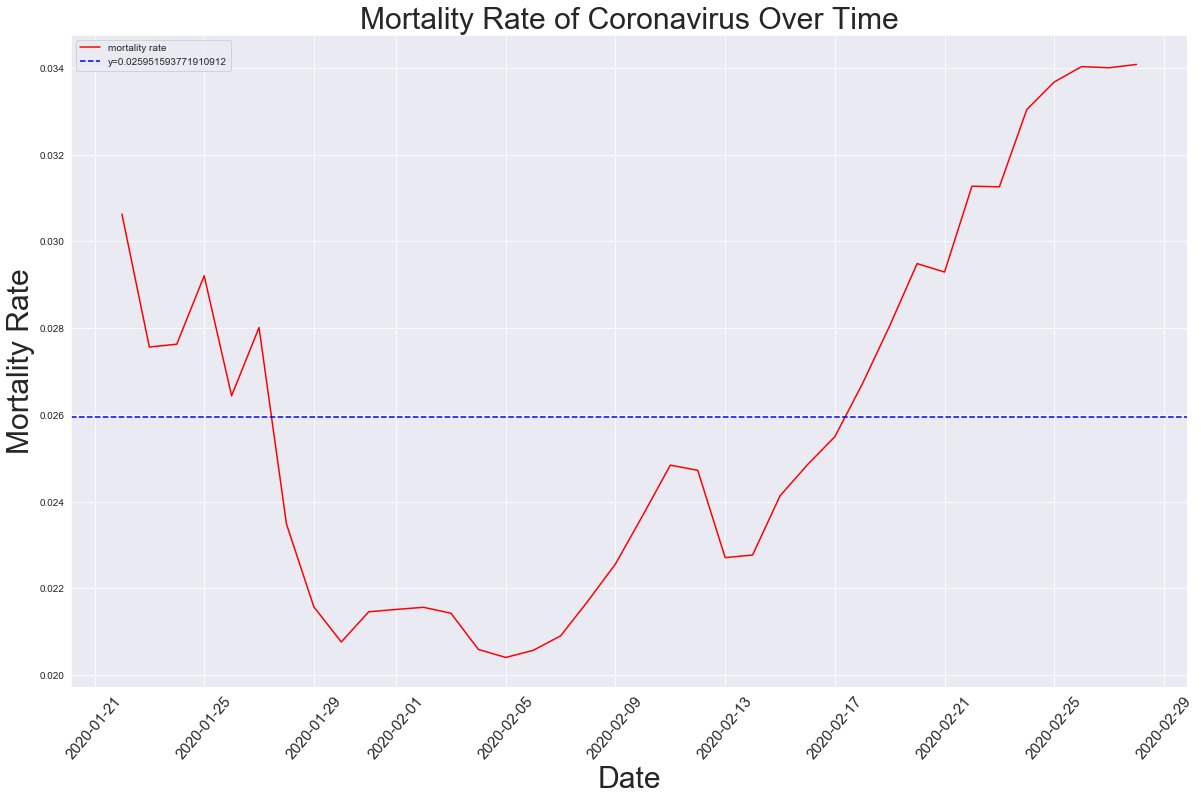

In [417]:
mean_mortality_rate = np.mean(mortality_rate)
plt.figure(figsize=(20, 12))
plt.plot(date, mortality_rate, color='red')
plt.axhline(y=mean_mortality_rate, linestyle='--',color='blue')
plt.title('Mortality Rate of Coronavirus Over Time', size=30)
plt.legend(['mortality rate', 'y='+str(mean_mortality_rate)])
plt.xlabel('Date', size=30)
plt.ylabel('Mortality Rate', size=30)
plt.xticks(rotation=50, size=15)
plt.show()


### Confirmed cases based on China Region 

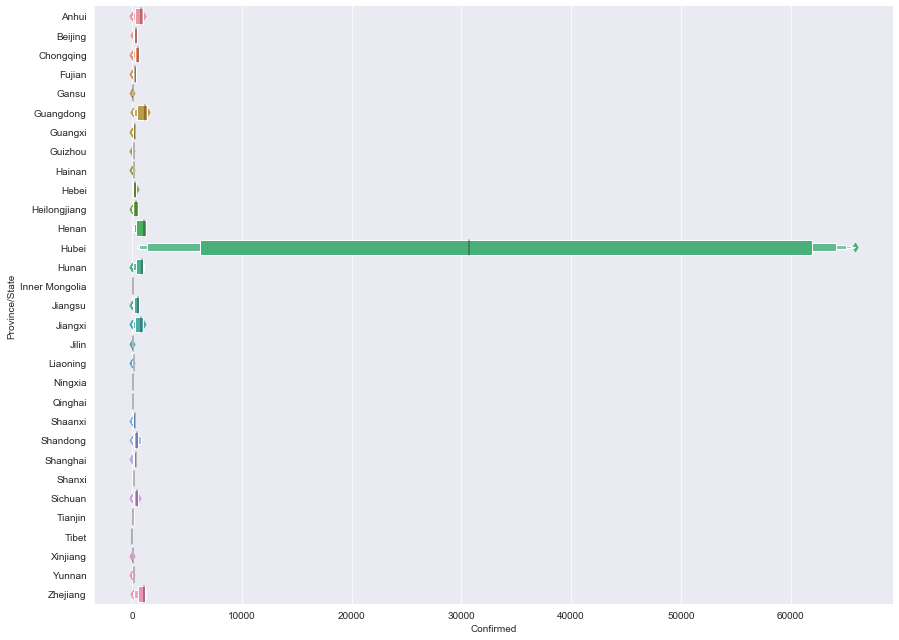

In [463]:
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

china_data = df[df['Country/Region'] == 'Mainland China']
sns.catplot(y="Province/State", x="Confirmed", data=china_data,kind='boxen',height=9,aspect=1.4)


Hubei is the epicentre of the disease.

### What is the death/recovery rate in Hubei?

In [433]:
geo_df["country"].replace({"Hong Kong, China":"China",
                                      
                                   }, inplace=True)


In [435]:
df_province = df.groupby(['Province/State','Date']).max().reset_index().sort_values('Date', ascending=False)
df_chinese_provinces = df_province[df_province['Country/Region'] == 'Mainland China']
df_chinese_provinces = df_chinese_provinces.drop_duplicates(subset = ['Province/State']).sort_values('Province/State')
# Macau, Taiwan and Hong Kong have their own countries in the dataset
df_chinese_provinces = df_chinese_provinces[~df_chinese_provinces['Province/State'].isin(['Macau', 'Taiwan', 'Hong Kong'])]
df_chinese_provinces = df_chinese_provinces[df_chinese_provinces["Confirmed"]>0]

df_ChDead = df_chinese_provinces.loc[:,["Province/State", "Recovered", "Deaths"]]
df_Hubei_Dead = df_ChDead[df_ChDead["Province/State"]=="Hubei"]

In [436]:
import plotly.graph_objs as go

colors = ['mediumturquoise', 'orangered']
columns = list(df_Hubei_Dead.iloc[:,1:3])
values = df_Hubei_Dead.iloc[:,1:3].values.tolist()[0]

fig = go.Figure(data=[go.Pie(labels=columns, 
                             values=values , hole=.3)]
               )

fig.update_traces(hoverinfo='label+percent+value', textinfo='label+percent', textfont_size=18,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2))
                 )

fig.update_layout(
    title_text="Death/Recovered Rate in Hubei (Wuhan)", height=500, width=700, showlegend=False)

fig.show()

In [437]:
df_patient = pd.read_csv('Datasets/patient.csv')

In [438]:
df_patient.head()

,id,sex,birth_year,country,region,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
0,1,female,1984.0,China,filtered at airport,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaN,released
1,2,male,1964.0,Korea,filtered at airport,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaN,released
2,3,male,1966.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaN,released
3,4,male,1964.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaN,released
4,5,male,1987.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,31.0,2020-01-30,2020-03-02,NaN,released


In [439]:
df_patient['age'] = 2020 - df_patient['birth_year']
deaths = df_patient[df_patient['state'] == 'deceased']
deaths.head()

,id,sex,birth_year,country,region,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state,age
37,38,female,1963.0,Korea,Daegu,NaN,NaN,NaN,NaN,NaN,2020-02-18,NaN,2020-02-23,deceased,57.0
53,54,male,1963.0,Korea,Gyeongsangbuk-do,Cheongdo Daenam Hospital,NaN,NaN,NaN,NaN,2020-02-19,NaN,2020-02-23,deceased,57.0
54,55,male,1961.0,Korea,Gyeongsangbuk-do,Cheongdo Daenam Hospital,NaN,NaN,NaN,NaN,2020-02-19,NaN,2020-02-23,deceased,59.0
103,104,male,1957.0,Korea,Gyeongsangbuk-do,Cheongdo Daenam Hospital,NaN,NaN,NaN,NaN,2020-02-20,NaN,2020-02-19,deceased,63.0
106,107,male,1953.0,Korea,Gyeongsangbuk-do,Cheongdo Daenam Hospital,NaN,NaN,NaN,NaN,2020-02-21,NaN,2020-02-24,deceased,67.0


### Age distribution of death

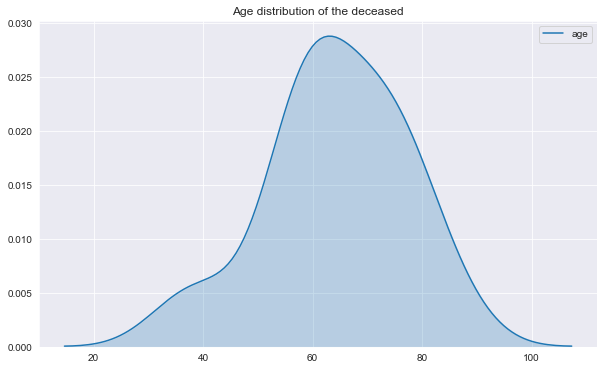

In [440]:
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
plt.title("Age distribution of the deceased")
sns.kdeplot(data=deaths['age'], shade=True)

In [367]:
male_deaths = deaths[deaths['sex'] == 'male']
female_deaths = deaths[deaths['sex'] == 'female']


### Age distribution of death by gender

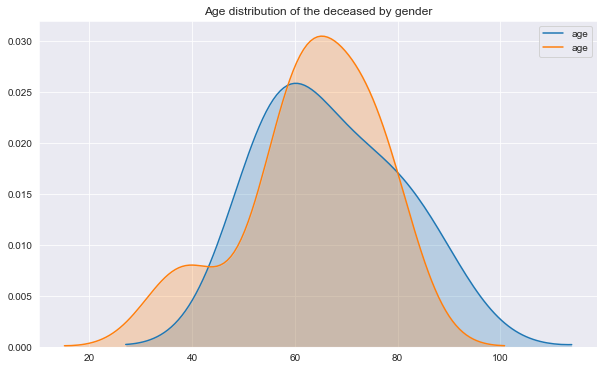

In [369]:
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
plt.title("Age distribution of the deceased by gender")
sns.kdeplot(data=female_deaths['age'], shade=True)
sns.kdeplot(data=male_deaths['age'], shade=True)


In [465]:
df_patient['birth_year'] = pd.to_numeric(df_patient['birth_year'], errors='coerce')
df_patient = df_patient.dropna(subset=['birth_year'])
df_patient['birth_year'] = df_patient['birth_year'].astype(int)


/Users/uyennguyen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Birth year distribution of confirmed cases

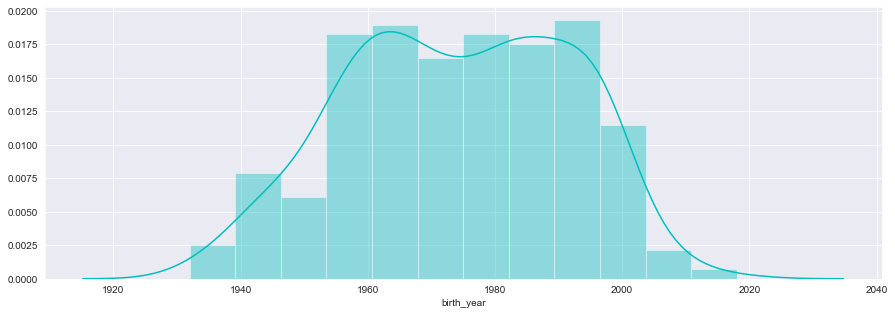

In [453]:
fig, ax = plt.subplots(figsize=(15,5))
sns.distplot(df_patient.birth_year, color='c')

### Time from confirmation to release or decease

In [377]:
date_cols = ["confirmed_date", "released_date", "deceased_date"]
for col in date_cols:
    df_patient[col] = pd.to_datetime(df_patient[col])
    

In [386]:
df_patient['days_to_release'] = df_patient['released_date'] - df_patient['confirmed_date']
df_patient['days_to_decease'] = df_patient['deceased_date'] - df_patient['confirmed_date']

df_patient['duration_days'] = df_patient[['days_to_release','days_to_decease']].min(axis=1).dt.days


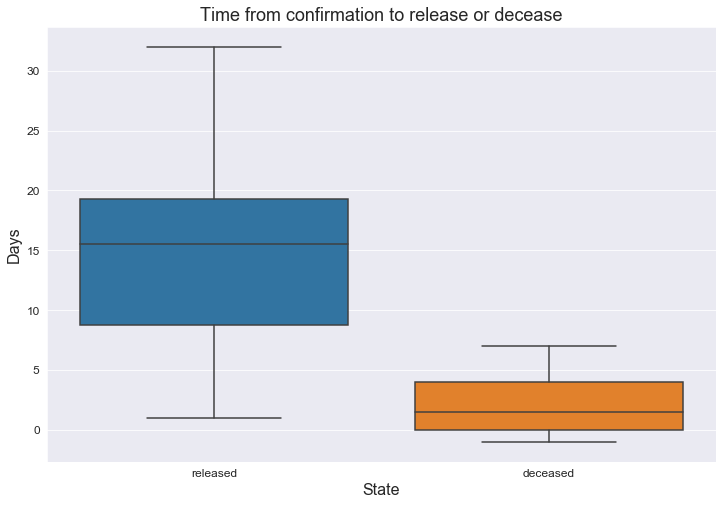

In [389]:
plt.figure(figsize=(12,8))
sns.boxplot(x="state",
           y='duration_days',
           order=['released','deceased'],
           data=df_patient)
plt.title('Time from confirmation to release or decease', fontsize=18)
plt.xlabel("State", fontsize=16)
plt.ylabel("Days", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()